In [11]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm
import time
import random

In [54]:
#Super basic model
random.seed(7)

In [ ]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('./input/sp500.csv', 50, True)

In [55]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.03301119804382324


In [56]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=3,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/3
3523/3523 [==============================] - 13s - loss: 0.0024 - val_loss: 0.0014
Epoch 2/3
3523/3523 [==============================] - 11s - loss: 9.0311e-04 - val_loss: 7.4122e-04
Epoch 3/3
3523/3523 [==============================] - 11s - loss: 6.5376e-04 - val_loss: 7.1805e-04


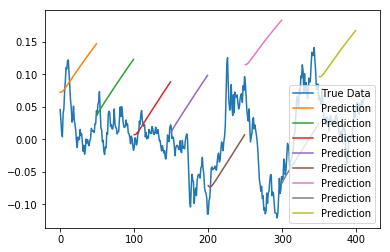

In [57]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)